In [1]:
# ライブラリの読み込み
import networkx as nx
import numpy as np

import random

random.seed(246)

In [2]:
# Graphインスタンスの初期化
G = nx.Graph()

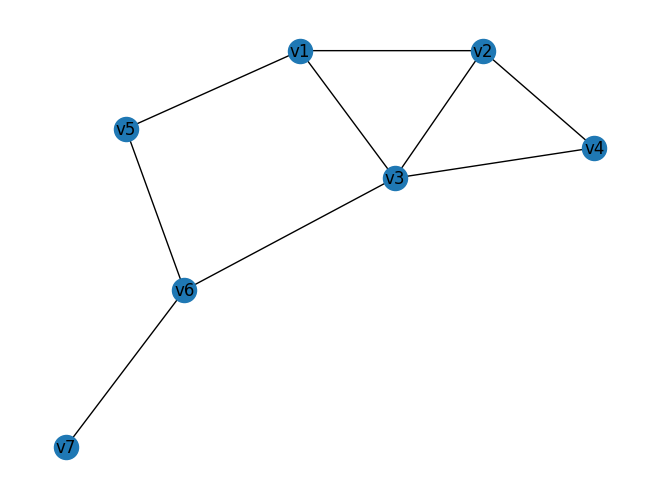

In [3]:
# エッジリストからGraphオブジェクトの作成
edge_list = [
    ("v1", "v2"),
    ("v1", "v3"),
    ("v1", "v5"),
    ("v2", "v3"),
    ("v2", "v4"),
    ("v3", "v4"),
    ("v3", "v6"),
    ("v5", "v6"),
    ("v6", "v7"),
]

G = nx.Graph(edge_list)
nx.draw(G, with_labels=True)

In [4]:
# ノード一覧の確認
print(G.nodes())
# ノードに付随する情報も合わせて確認。（ここでは空）
print(G.nodes(data=True))

# エッジ一覧の確認
print(G.edges())
# エッジに付随する情報も合わせて確認。（ここでは空）
print(G.edges(data=True))

['v1', 'v2', 'v3', 'v5', 'v4', 'v6', 'v7']
[('v1', {}), ('v2', {}), ('v3', {}), ('v5', {}), ('v4', {}), ('v6', {}), ('v7', {})]
[('v1', 'v2'), ('v1', 'v3'), ('v1', 'v5'), ('v2', 'v3'), ('v2', 'v4'), ('v3', 'v4'), ('v3', 'v6'), ('v5', 'v6'), ('v6', 'v7')]
[('v1', 'v2', {}), ('v1', 'v3', {}), ('v1', 'v5', {}), ('v2', 'v3', {}), ('v2', 'v4', {}), ('v3', 'v4', {}), ('v3', 'v6', {}), ('v5', 'v6', {}), ('v6', 'v7', {})]


In [5]:
# 命名の対応を作成する
mapping = {
    "v1": "a",
    "v2": "b",
    "v3": "c",
}

# 命名の対応にしたがって名前をつける
H = nx.relabel_nodes(G, mapping)
print(H.nodes())

['a', 'b', 'c', 'v5', 'v4', 'v6', 'v7']


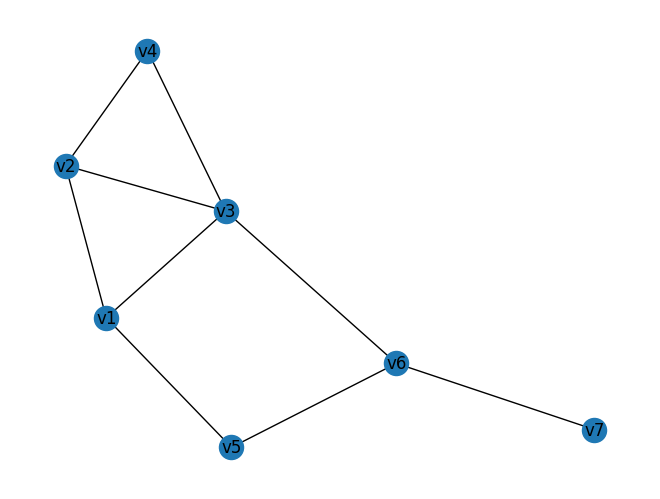

In [6]:
# 隣接リストの作成
adj_list = {
    "v1": ["v2", "v3", "v5"],
    "v2": ["v1", "v3", "v4"],
    "v3": ["v1", "v2", "v4", "v6"],
    "v4": ["v2", "v3"],
    "v5": ["v1", "v6"],
    "v6": ["v3", "v5", "v7"],
    "v7": ["v6"],
}

# 隣接リストからGraphオブジェクトの作成
G = nx.Graph(adj_list)
nx.draw(G, with_labels=True)

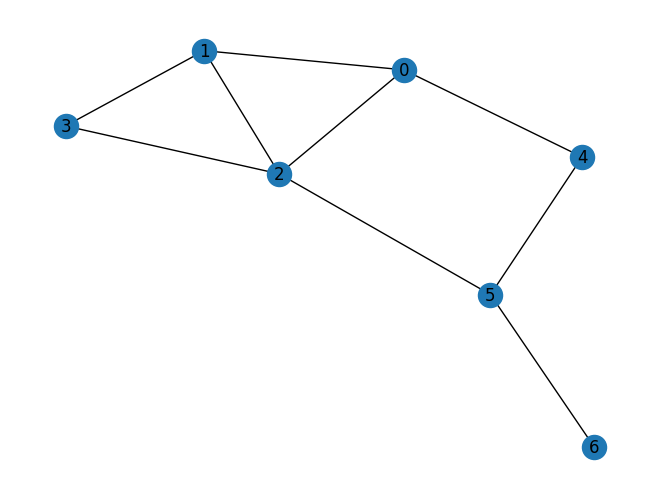

In [7]:
# 隣接行列の作成
adj_matrix = np.array(
    [
        [0, 1, 1, 0, 1, 0, 0],
        [1, 0, 1, 1, 0, 0, 0],
        [1, 1, 0, 1, 0, 1, 0],
        [0, 1, 1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 1, 0, 1],
        [0, 0, 0, 0, 0, 1, 0],
    ],
)

# 隣接行列からGraphオブジェクトの作成
G = nx.from_numpy_array(adj_matrix)
nx.draw(G, with_labels=True)

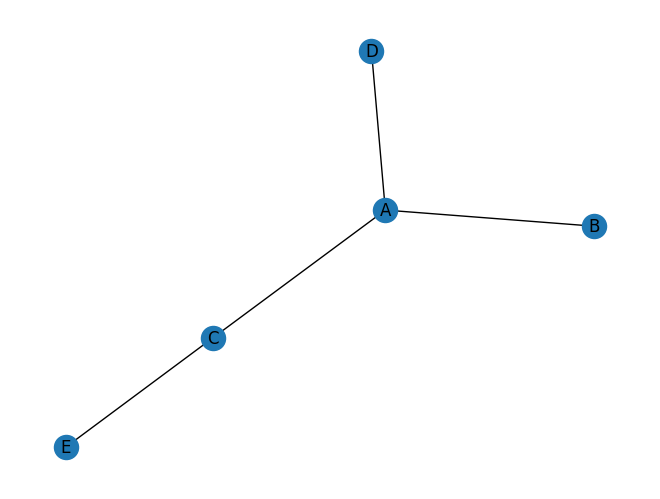

In [9]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# データフレームの作成
data = {
    "source": ["A", "B", "C", "A"],  # 辞書のキーが列名に対応
    "target": ["D", "A", "E", "C"],  # ノード間の接続情報を表す
}
df = pd.DataFrame(data)  # 辞書からDataFrameを作成

# NetworkXグラフの作成
# 第2・第3引数にはノードを示す列名を指定
G_df = nx.from_pandas_edgelist(df, "source", "target")

# グラフの描画
nx.draw(G_df, with_labels=True)

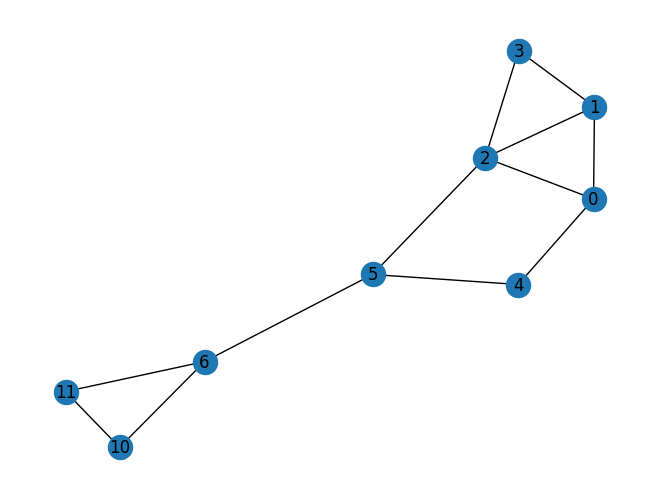

In [10]:
newG = G.copy()

# ノード単体の追加
newG.add_node(10)

# エッジ単位での追加
newG.add_edge(10, 11)

# 複数のエッジの追加
newG.add_edges_from([(11, 6), (10, 6)])
nx.draw(newG, with_labels=True)

In [11]:
newG = G.copy()

# ノードの属性情報の追加
newG.nodes[0]["name"] = "v1"
newG.nodes[0]["signal"] = 1.3

# 複数のノードに属性情報を追加
newG.add_nodes_from(
    [
        (1, {"name": "v2", "signal": 1.4}),
        (2, {"name": "v3", "signal": 1.5}),
    ]
)


# エッジに属性情報を追加
newG.edges[0, 4]["weight"] = 2
# custom attr
newG.edges[0, 4]["name"] = "fuga"

# ノード情報の表示
print(newG.nodes(data=True))

# エッジ情報の表示
print(newG.edges(data=True))

[(0, {'name': 'v1', 'signal': 1.3}), (1, {'name': 'v2', 'signal': 1.4}), (2, {'name': 'v3', 'signal': 1.5}), (3, {}), (4, {}), (5, {}), (6, {})]
[(0, 1, {'weight': 1}), (0, 2, {'weight': 1}), (0, 4, {'weight': 2, 'name': 'fuga'}), (1, 2, {'weight': 1}), (1, 3, {'weight': 1}), (2, 3, {'weight': 1}), (2, 5, {'weight': 1}), (4, 5, {'weight': 1}), (5, 6, {'weight': 1})]


In [12]:
# 別の方法
print(nx.get_node_attributes(newG, "name"))
print(nx.get_node_attributes(newG, "signal"))

print(nx.get_edge_attributes(newG, "weight"))
print(nx.get_edge_attributes(newG, "name"))

{0: 'v1', 1: 'v2', 2: 'v3'}
{0: 1.3, 1: 1.4, 2: 1.5}
{(0, 1): 1, (0, 2): 1, (0, 4): 2, (1, 2): 1, (1, 3): 1, (2, 3): 1, (2, 5): 1, (4, 5): 1, (5, 6): 1}
{(0, 4): 'fuga'}


In [14]:
import torch
import torch_geometric
from torch_geometric.data import Data

In [15]:
edge_index = torch.tensor([[0, 1, 1, 2], [1, 0, 2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

G = Data(x=x, edge_index=edge_index)

In [17]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root="./Cora", name="Cora")

Processing...
Done!


In [18]:
type(dataset)

torch_geometric.datasets.planetoid.Planetoid